<a href="https://colab.research.google.com/github/sahilpahapale/Web-Scraping/blob/main/Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import yfinance as yf
from matplotlib import pyplot as plt

# Extracting Tesla Stock Data Using yfinance

In [ ]:
Tesla = yf.Ticker('TSLA')

In [ ]:
Tesla_data = Tesla.history(period = 'max')

In [ ]:
Tesla_data.reset_index(inplace=True)
Tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Extracting Tesla Revenue Data Using Webscraping

In [ ]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(html_data, 'html.parser')
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter ending September 30,

In [ ]:
Table_data = soup.find('table')
Table_data

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2021</td>
<td style="text-align:center">$53,823</td>
</tr>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$31,536</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$24,578</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$21,461</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$11,759</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$7,000</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$4,046</td>
</tr>
<tr>
<td style="text-align:center">2014</td>
<td style="text-align:center">$3,198</td>
</tr>
<tr>
<td style="text-align:center">2013</td

In [ ]:
Titles = Table_data.find_all('th')

In [ ]:
DF = pd.DataFrame(columns = ['Date', 'revenue(Millions of US $)'])
DF

,Date,revenue(Millions of US $)


In [ ]:
column = Table_data.find_all('tr')
column

[<tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>,
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>,
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>,
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>,
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>,
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>,
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>,
 <tr>
 <td style="text-align:center">2015</td>
 <td style="text-align:center">$4,046</td>
 </tr>,
 <tr>
 <td style="text-align:center">2014</td>
 <td style="text-align:center">$3,198</td>
 </tr>,
 <tr>
 <td style="text-align:center">2013</td>
 <td style="text-alig

In [ ]:
for row in column[1:]:
  content = row.find_all('td')
  row_data = [data.text for data in content]

  length = len(DF)
  DF.loc[length] = row_data

In [ ]:
DF

,Date,revenue(Millions of US $)
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"
5,2016,"$7,000"
6,2015,"$4,046"
7,2014,"$3,198"
8,2013,"$2,013"
9,2012,$413


In [ ]:
DF.to_excel('tesla.xlsx', index = False)

# Extracting GameStop Stock Data Using yfinance

In [ ]:
Gamestop = yf.Ticker('GME')

In [ ]:
Gamestop_data = Gamestop.history(period= 'max')

In [ ]:
Gamestop_data.reset_index(inplace = True)
Gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Extracting GameStop Revenue Data Using Webscraping

In [ ]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'


In [ ]:
html_data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(html_data , 'html.parser')
soup

<!DOCTYPE html>

<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript"></script><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript"></script><script async="" src=".

In [ ]:
table = soup.find_all('table')[0]
table

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">GameStop Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$6,466</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$8,285</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$8,547</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$7,965</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$9,364</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$9,296</td>
</tr>
<tr>
<td style="text-align:center">2014</td>
<td style="text-align:center">$9,040</td>
</tr>
<tr>
<td style="text-align:center">2013</td>
<td style="text-align:center">$8,887</td>
</tr>
<tr>
<td style="text-align:center">2012</td>


In [ ]:
df = pd.DataFrame(columns = ['Date', 'revenue(Millions of US $)'])
df

,Date,revenue(Millions of US $)


In [ ]:
Column = table.find_all('tr')
Column

[<tr>
 <th colspan="2" style="text-align:center">GameStop Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>,
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$6,466</td>
 </tr>,
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$8,285</td>
 </tr>,
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$8,547</td>
 </tr>,
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$7,965</td>
 </tr>,
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$9,364</td>
 </tr>,
 <tr>
 <td style="text-align:center">2015</td>
 <td style="text-align:center">$9,296</td>
 </tr>,
 <tr>
 <td style="text-align:center">2014</td>
 <td style="text-align:center">$9,040</td>
 </tr>,
 <tr>
 <td style="text-align:center">2013</td>
 <td style="text-align:center">$8,887</td>
 </tr>,
 <tr>
 <td style="text-align:center">2012</td>
 <td style="text-align:

In [ ]:
for Row in Column[1:]:
  Value = Row.find_all('td')
  Final_value = [Data.text for Data in Value]
  Length = len(df)
  df.loc[Length] = Final_value

In [ ]:
  print(df)

    Date revenue(Millions of US $)
0   2020                    $6,466
1   2019                    $8,285
2   2018                    $8,547
3   2017                    $7,965
4   2016                    $9,364
5   2015                    $9,296
6   2014                    $9,040
7   2013                    $8,887
8   2012                    $9,551
9   2011                    $9,474
10  2010                    $9,078
11  2009                    $8,806
12  2008                    $7,094
13  2007                    $5,319
14  2006                    $3,092
15  2005                    $1,843


In [ ]:
df.to_excel('Gamestop.xlsx', index = False)

# Tesla Stock and Revenue Dashboard

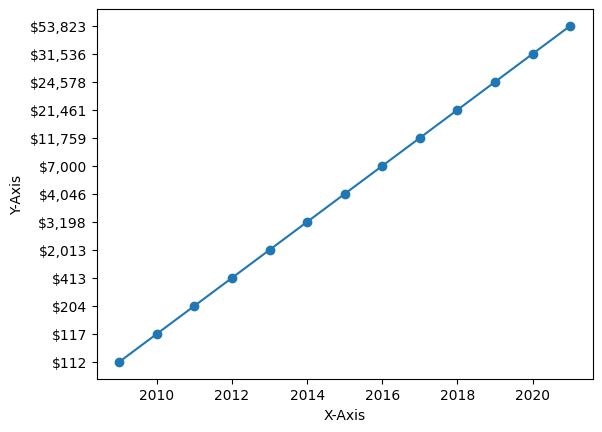

In [57]:
A = pd.read_excel('tesla.xlsx')

x_axis = A['Date']
y_axis = A['revenue(Millions of US $)']

plt.plot(x_axis, y_axis, marker='o')
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")


plt.gca().invert_yaxis()

plt.show()

# GameStop Stock and Revenue Dashboard

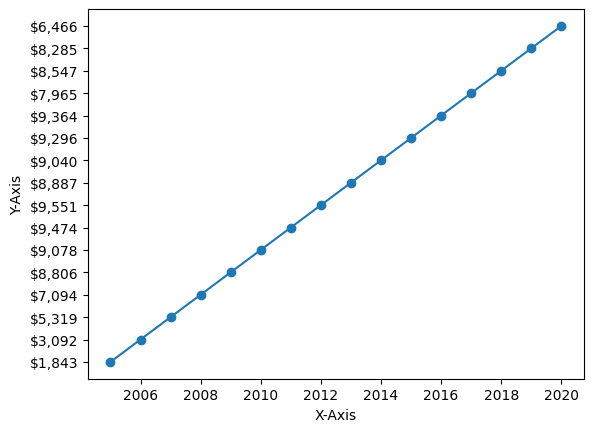

In [59]:
B = pd.read_excel('Gamestop.xlsx')

x_axis = B['Date']
y_axis = B['revenue(Millions of US $)']

plt.plot(x_axis, y_axis, marker='o')
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")


plt.gca().invert_yaxis()

plt.show()